In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 27)

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is FAC0-9EC2

 Directory of C:\Users\User\Documents\AIyapayzeka\Interview

01.08.2023  11:33    <DIR>          .
21.07.2023  20:29    <DIR>          ..
31.07.2023  11:29    <DIR>          .ipynb_checkpoints
01.08.2023  11:33           707.327 Demand Prediction.ipynb
31.07.2023  11:31           131.382 Demand Prediction-Copy1.ipynb
21.07.2023  20:29         5.737.472 final_data.xlsx
21.07.2023  20:29            26.254 Problem Description.docx
01.08.2023  10:45             3.598 Problem Description.ipynb
21.07.2023  20:29            17.027 scaling_df.xlsx
               6 File(s)      6.623.060 bytes
               3 Dir(s)  20.183.732.224 bytes free


## EDA - Exploratory Data Analysis

In [3]:
df_scaling = pd.read_excel("scaling_df.xlsx")

In [4]:
df_scaling

,Unnamed: 0,Country,Scaling Factor
0,0,Australia,3.50
1,1,Canada,2.50
2,2,Germany,2.25
3,3,France,1.85
4,4,India,1.20
5,5,Japan,1.55
6,6,United States of America,1.50


In [5]:
df = pd.read_excel("final_data.xlsx")

In [6]:
df.sample(10)

,Unnamed: 0,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
42551,12498,1,7,3,4,8,6,16,7,10,1,24,13,13,14,21,20,17,19,19,20,21,22,23,24,factor4,685
28723,3727,1,7,3,4,6,6,11,8,7,19,11,10,13,14,17,16,17,19,18,20,21,21,23,24,factor3,688
8452,8452,1,2,3,4,4,6,1,6,9,8,23,12,13,14,4,16,17,21,20,19,21,23,23,24,factor1,417
20419,5398,1,1,3,4,6,4,8,7,9,5,1,12,13,14,5,15,17,18,20,21,21,23,23,24,factor2,492
34280,4227,1,3,3,4,3,8,9,7,7,1,0,10,13,14,30,16,17,19,18,21,21,22,23,24,factor4,539
49865,385,1,7,3,4,3,7,8,11,7,1,8,13,13,14,42,15,17,19,20,21,21,20,23,24,NaN,751
45470,15417,1,1,3,4,4,6,6,10,11,17,8,11,12,14,6,16,17,20,19,20,21,22,23,24,factor4,547
1276,1276,1,1,3,4,4,5,0,10,9,6,3,15,13,14,19,14,17,19,20,21,21,22,23,24,factor1,364
7974,7974,1,0,3,4,2,7,8,6,9,1,8,10,14,14,9,15,17,19,20,22,21,24,22,24,factor1,363
33575,3522,0,0,3,4,3,7,2,9,10,16,16,12,13,14,1,16,17,17,21,21,21,23,24,24,factor4,546


In [7]:
df["factor"].unique()

array(['factor1', 'factor2', 'factor3', 'factor4', nan], dtype=object)

In [8]:
df.shape

(50000, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   AUS_1       50000 non-null  int64 
 2   AUS_2       50000 non-null  int64 
 3   AUS_3       50000 non-null  int64 
 4   CAN_1       50000 non-null  int64 
 5   CAN_2       50000 non-null  int64 
 6   CAN_3       50000 non-null  int64 
 7   GER_1       50000 non-null  int64 
 8   GER_2       50000 non-null  int64 
 9   GER_3       50000 non-null  int64 
 10  FRA_1       50000 non-null  int64 
 11  FRA_2       50000 non-null  int64 
 12  FRA_3       50000 non-null  int64 
 13  IND_1       50000 non-null  int64 
 14  IND_2       50000 non-null  int64 
 15  IND_3       50000 non-null  int64 
 16  JAP_1       50000 non-null  int64 
 17  JAP_2       50000 non-null  int64 
 18  JAP_3       50000 non-null  int64 
 19  USA_1       50000 non-null  int64 
 20  USA_2 

In [10]:
df.isnull().sum()

Unnamed: 0      0
AUS_1           0
AUS_2           0
AUS_3           0
CAN_1           0
CAN_2           0
CAN_3           0
GER_1           0
GER_2           0
GER_3           0
FRA_1           0
FRA_2           0
FRA_3           0
IND_1           0
IND_2           0
IND_3           0
JAP_1           0
JAP_2           0
JAP_3           0
USA_1           0
USA_2           0
USA_3           0
UK_1            0
UK_2            0
UK_3            0
factor        520
Sales           0
dtype: int64

In [11]:
df["Sales"].mean()

524.93124

In [12]:
df["factor"].value_counts()

factor4    19427
factor1    15021
factor2     9975
factor3     5057
Name: factor, dtype: int64

In [13]:
df[df["Unnamed: 0"] == 1]

,Unnamed: 0,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
1,1,1,1,3,4,6,7,4,6,12,10,8,14,12,14,7,17,17,15,18,20,21,23,24,24,factor1,395
15022,1,1,1,3,4,7,5,13,8,7,14,0,10,12,14,14,16,17,18,18,20,21,24,23,24,factor2,540
24997,1,1,2,3,4,4,5,1,9,8,42,2,14,13,14,22,15,17,19,18,21,21,24,22,24,factor3,680
30054,1,1,1,3,4,4,6,3,7,9,2,28,12,13,14,2,14,17,17,19,20,21,23,23,24,factor4,585
49481,1,1,3,3,4,6,5,4,8,9,7,0,13,13,14,4,17,17,20,19,19,21,22,23,24,NaN,640


In [14]:
# We have 5 different row for saler 1 

In [15]:
df[df["Unnamed: 0"] == 10035]

,Unnamed: 0,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
10035,10035,1,2,3,4,8,5,7,8,10,8,17,13,12,14,6,18,17,16,19,20,21,21,22,24,factor1,425
40088,10035,1,1,3,4,6,5,18,9,10,8,2,12,13,14,15,14,17,18,19,20,21,23,23,24,factor4,569


In [16]:
# We have 2 different row for saler 10035 

In [17]:
df[df["Unnamed: 0"] == 18900]

,Unnamed: 0,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
48953,18900,1,4,3,4,6,6,8,11,9,6,17,12,12,14,29,16,17,18,16,18,21,22,23,24,factor4,620


In [18]:
# We have 1 row for saler 10035 

#### We have to collect all sales for a seller who has more than 1 recording.

In [21]:
df_grouped = df.groupby('Unnamed: 0').sum()

In [22]:
df_grouped

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,Sales
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,23,15,20,26,27,28,37,46,31,34,60,64,70,54,78,85,96,94,100,105,111,116,120,2775
1,5,8,15,20,27,28,25,38,45,75,38,63,63,70,49,79,85,89,92,100,105,116,115,120,2840
2,5,7,15,20,27,29,46,31,47,59,29,57,65,70,24,85,85,83,95,98,105,112,114,120,2619
3,6,8,15,20,21,28,21,38,46,66,29,61,65,70,78,81,85,91,95,99,105,111,114,120,2764
4,5,6,15,20,22,31,33,39,39,49,44,57,65,70,13,69,85,84,95,102,104,109,115,120,2676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19422,1,3,3,4,7,6,1,9,10,3,1,11,13,14,25,14,17,19,18,21,21,22,22,24,531
19423,1,2,3,4,4,6,4,7,7,8,7,10,14,14,2,16,17,20,17,22,20,21,23,24,514
19424,1,0,3,4,6,5,0,5,8,19,9,12,12,14,21,14,17,20,19,19,21,22,22,24,519


In [39]:
# we have 19427 different seller

In [23]:
df_grouped.describe()

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,Sales
count,19427.000000,19427.000000,19427.000000,19427.00000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000,19427.000000
mean,2.566686,5.126010,7.721213,10.29495,12.857518,15.439749,18.120399,20.563597,23.161528,25.638081,28.419519,30.872343,33.462655,36.034643,38.585628,41.156947,43.753539,46.328563,48.897256,51.464766,54.039584,56.615123,59.195553,61.769650,1351.035260
std,1.244454,4.026126,3.454445,4.60606,6.448832,7.030849,13.878440,9.631404,10.529782,19.647625,21.793534,13.932655,15.008288,16.123145,29.461286,18.609578,19.575186,20.870527,21.929817,23.068460,24.182647,25.377138,26.515130,27.635694,638.323631
min,0.000000,0.000000,3.000000,3.00000,-2.000000,3.000000,0.000000,2.000000,5.000000,0.000000,0.000000,8.000000,11.000000,13.000000,0.000000,9.000000,17.000000,12.000000,16.000000,17.000000,20.000000,18.000000,20.000000,23.000000,459.000000
25%,2.000000,2.000000,6.000000,8.00000,7.000000,10.000000,7.000000,13.000000,16.000000,11.000000,12.000000,22.000000,25.000000,28.000000,16.000000,29.000000,34.000000,33.000000,36.000000,38.000000,41.000000,42.000000,45.000000,48.000000,893.000000
50%,3.000000,4.000000,9.000000,12.00000,12.000000,16.000000,15.000000,20.000000,24.000000,22.000000,24.000000,32.000000,37.000000,42.000000,32.000000,43.000000,51.000000,49.000000,55.000000,58.000000,62.000000,63.000000,67.000000,72.000000,1398.000000
75%,4.000000,7.000000,12.000000,16.00000,18.000000,21.000000,26.000000,28.000000,32.000000,36.000000,40.000000,44.000000,50.000000,56.000000,55.000000,58.000000,68.000000,66.000000,73.000000,77.000000,83.000000,84.000000,89.000000,96.000000,2033.000000
max,7.000000,35.000000,15.000000,21.00000,37.000000,36.000000,100.000000,52.000000,53.000000,172.000000,186.000000,67.000000,70.000000,71.000000,234.000000,92.000000,85.000000,102.000000,102.000000,106.000000,107.000000,119.000000,120.000000,121.000000,3265.000000


In [24]:
df_grouped.corr()

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,Sales
AUS_1,1.000000,0.525783,0.921684,0.921639,0.824942,0.904287,0.531396,0.879755,0.907084,0.544716,0.545656,0.911637,0.919407,0.921592,0.535256,0.909990,0.921684,0.913789,0.920064,0.919991,0.921532,0.919437,0.920459,0.921686,0.910827
AUS_2,0.525783,1.000000,0.569853,0.569837,0.508768,0.558735,0.328183,0.544203,0.560416,0.333829,0.340314,0.564065,0.568312,0.569814,0.336376,0.563167,0.569853,0.565052,0.568306,0.568736,0.569599,0.568789,0.568909,0.569856,0.585276
AUS_3,0.921684,0.569853,1.000000,0.999971,0.894312,0.980580,0.577801,0.954662,0.984679,0.590291,0.592364,0.989757,0.997550,0.999923,0.582353,0.987323,1.000000,0.991853,0.997841,0.998217,0.999784,0.997486,0.998816,0.999999,0.987385
CAN_1,0.921639,0.569837,0.999971,1.000000,0.894268,0.980546,0.577742,0.954618,0.984663,0.590300,0.592341,0.989725,0.997518,0.999894,0.582364,0.987296,0.999971,0.991817,0.997810,0.998186,0.999754,0.997455,0.998788,0.999970,0.987358
CAN_2,0.824942,0.508768,0.894312,0.894268,1.000000,0.876903,0.520308,0.853455,0.880367,0.522094,0.526846,0.885574,0.892263,0.894229,0.523313,0.882936,0.894312,0.887058,0.892439,0.892536,0.894103,0.892021,0.893269,0.894305,0.886293
CAN_3,0.904287,0.558735,0.980580,0.980546,0.876903,1.000000,0.568109,0.935822,0.965381,0.577029,0.581615,0.970682,0.978047,0.980517,0.570745,0.968462,0.980580,0.973036,0.978373,0.978728,0.980400,0.978062,0.979344,0.980579,0.969265
GER_1,0.531396,0.328183,0.577801,0.577742,0.520308,0.568109,1.000000,0.549676,0.569429,0.341913,0.338080,0.571315,0.576224,0.577764,0.332444,0.572057,0.577801,0.574845,0.576478,0.577059,0.577704,0.576792,0.577242,0.577799,0.605605
GER_2,0.879755,0.544203,0.954662,0.954618,0.853455,0.935822,0.549676,1.000000,0.940160,0.566468,0.564313,0.944855,0.952678,0.954630,0.554424,0.942416,0.954662,0.947240,0.952702,0.952772,0.954451,0.952417,0.953330,0.954666,0.945998
GER_3,0.907084,0.560416,0.984679,0.984663,0.880367,0.965381,0.569429,0.940160,1.000000,0.581757,0.582260,0.974512,0.982122,0.984598,0.571654,0.972154,0.984679,0.976653,0.982504,0.982943,0.984472,0.982318,0.983529,0.984675,0.973604
FRA_1,0.544716,0.333829,0.590291,0.590300,0.522094,0.577029,0.341913,0.566468,0.581757,1.000000,0.346128,0.585163,0.588859,0.590267,0.341507,0.580559,0.590291,0.586317,0.589689,0.589357,0.590188,0.589649,0.589513,0.590289,0.605001


<AxesSubplot:>

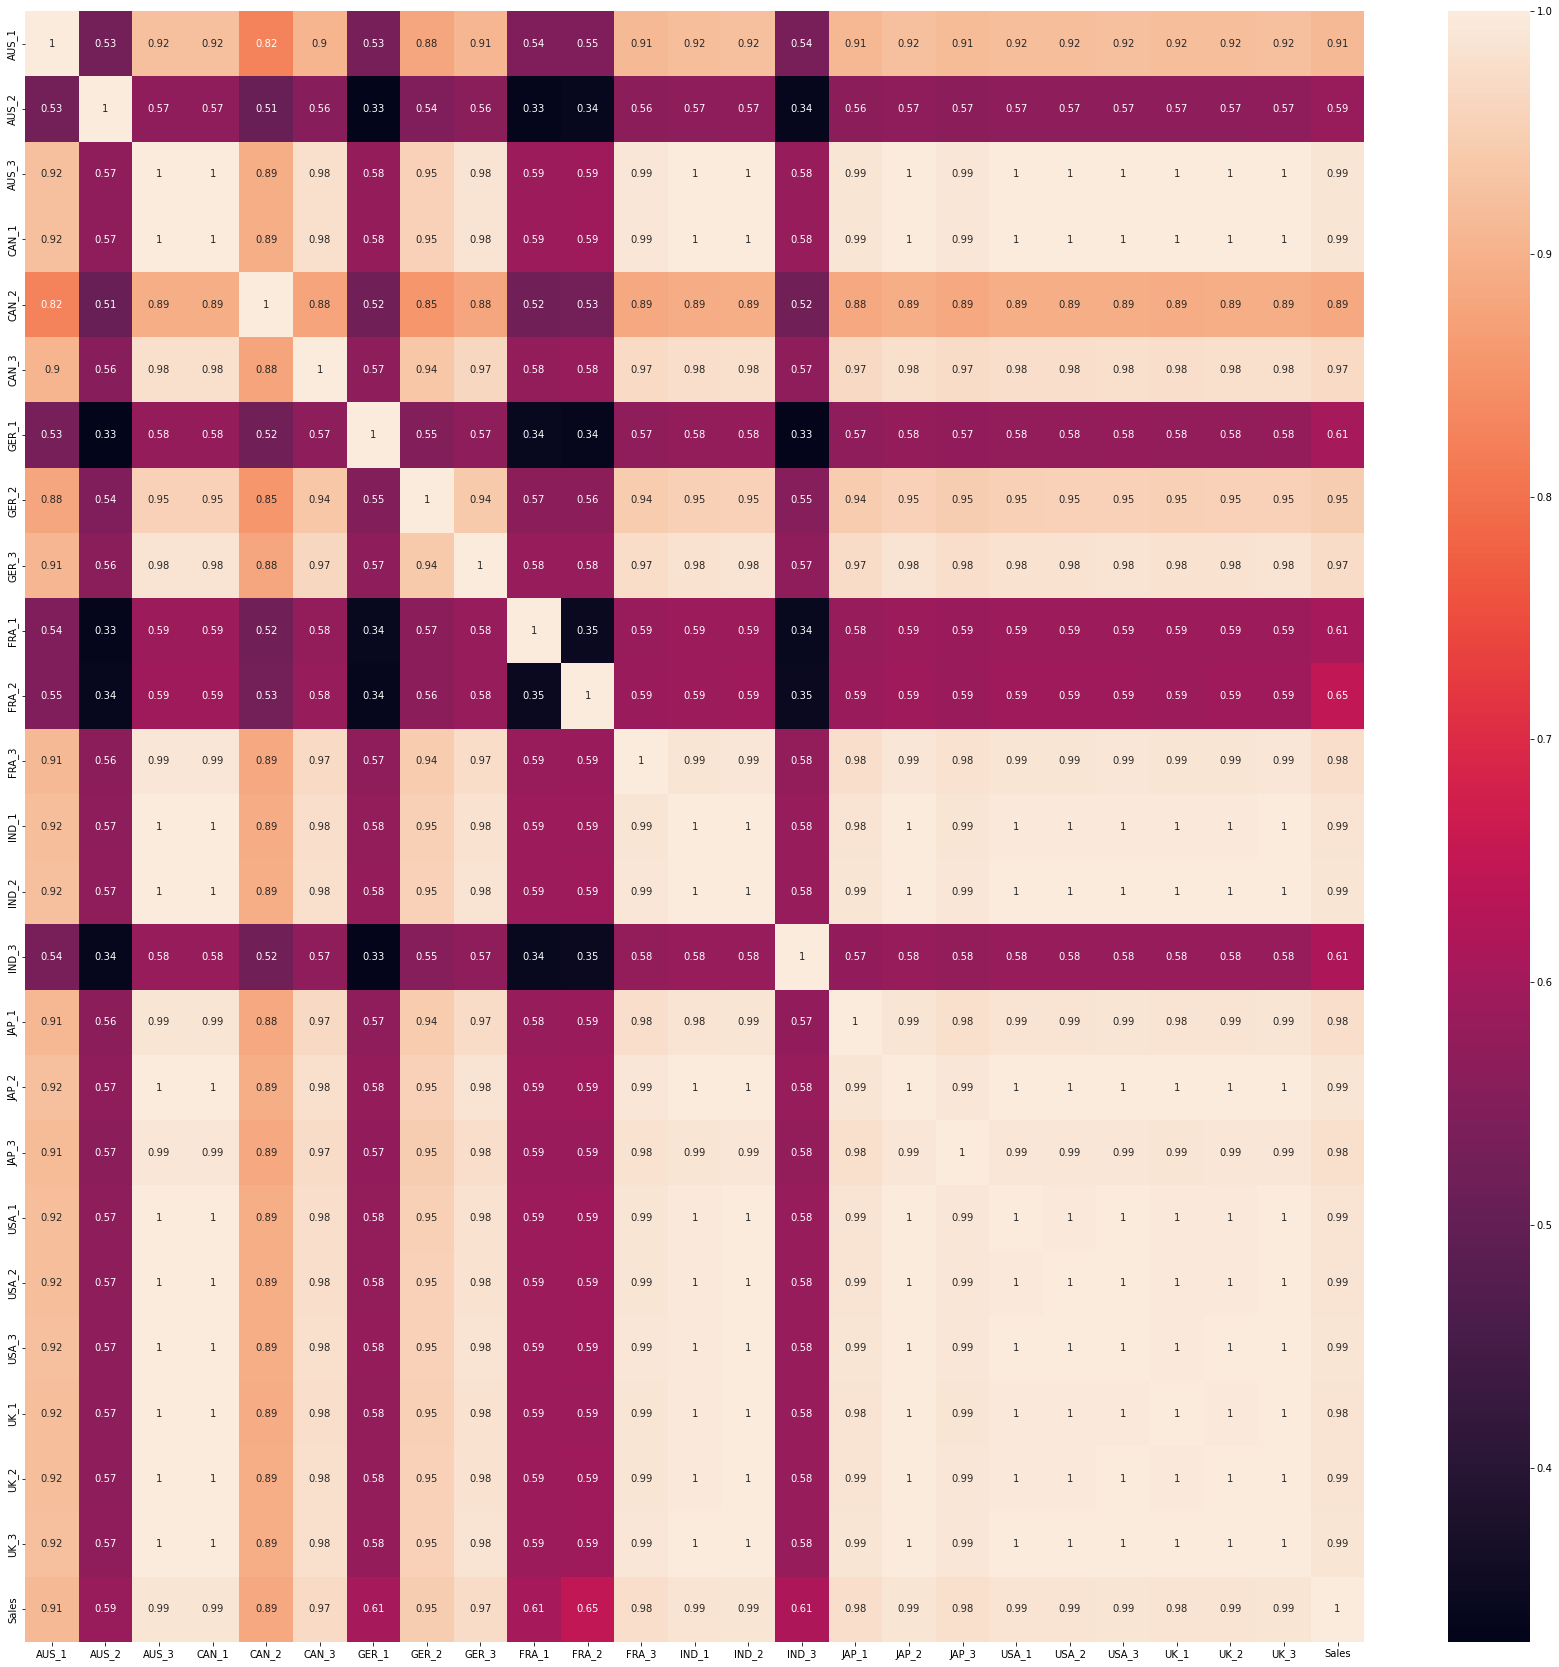

In [25]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(df_grouped.corr(), annot = True)

### Data Visualization 

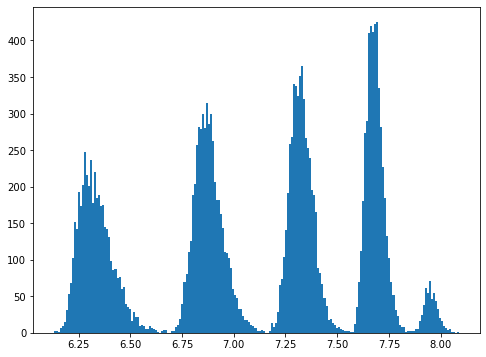

In [26]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df_grouped.Sales)), bins=200);

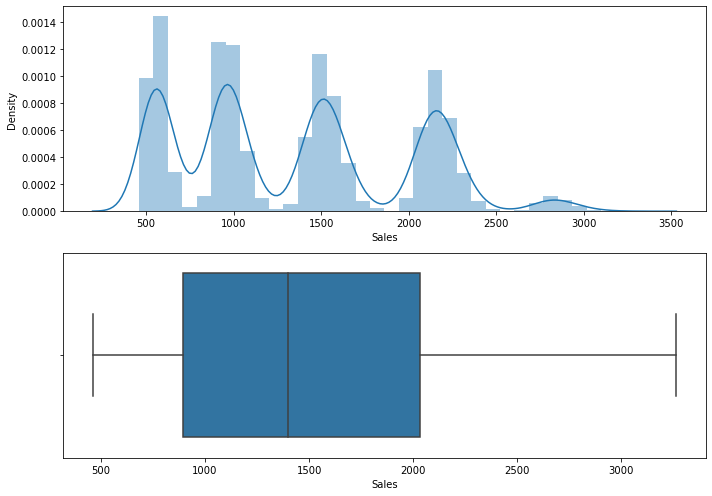

In [27]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df_grouped['Sales'])
fig.add_subplot(2,1,2)
sns.boxplot(df_grouped['Sales'])
plt.tight_layout();

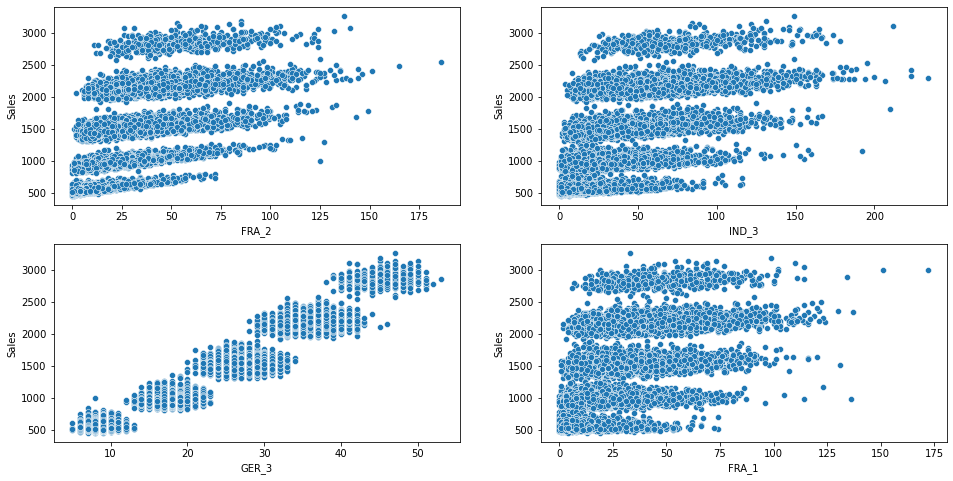

In [28]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df_grouped['FRA_2'], df_grouped['Sales'])
fig.add_subplot(2,2,2)
sns.scatterplot(df_grouped['IND_3'],df_grouped['Sales'])
fig.add_subplot(2,2,3)
sns.scatterplot(df_grouped['GER_3'],df_grouped['Sales'])
fig.add_subplot(2,2,4)
sns.scatterplot(df_grouped['FRA_1'],df_grouped['Sales']);

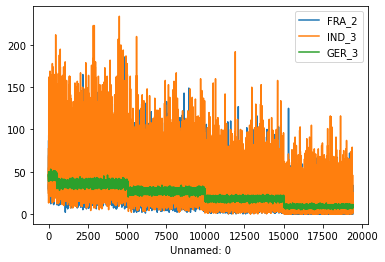

In [29]:
df_grouped.FRA_2.plot(), df_grouped.IND_3.plot(), df_grouped.GER_3.plot()
plt.legend();

## Feature Engineering


In [30]:
df_scaling

,Unnamed: 0,Country,Scaling Factor
0,0,Australia,3.50
1,1,Canada,2.50
2,2,Germany,2.25
3,3,France,1.85
4,4,India,1.20
5,5,Japan,1.55
6,6,United States of America,1.50


#### Multiply this scaling factor with related country sales

In [31]:
multipliers = {
    'AUS': 3.5,
    'CAN': 2.5,
    'GER': 2.25,
    'FRA': 1.85,
    'IND': 1.20,
    'JAP': 1.55,
    'USA': 1.50,
    'UK': 1
}

for country, multiplier in multipliers.items():
    columns = [column for column in df_grouped.columns if column.startswith(country)]
    df_grouped[columns] = df_grouped[columns].mul(multiplier)

#### Lets check new grouped dataframe

In [32]:
df_grouped

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,FRA_3,IND_1,IND_2,IND_3,JAP_1,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,Sales
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.5,80.5,52.5,50.0,65.0,67.5,63.00,83.25,103.50,57.35,62.90,111.00,76.8,84.0,64.8,120.90,131.75,148.80,141.0,150.0,157.5,111,116,120,2775
1,17.5,28.0,52.5,50.0,67.5,70.0,56.25,85.50,101.25,138.75,70.30,116.55,75.6,84.0,58.8,122.45,131.75,137.95,138.0,150.0,157.5,116,115,120,2840
2,17.5,24.5,52.5,50.0,67.5,72.5,103.50,69.75,105.75,109.15,53.65,105.45,78.0,84.0,28.8,131.75,131.75,128.65,142.5,147.0,157.5,112,114,120,2619
3,21.0,28.0,52.5,50.0,52.5,70.0,47.25,85.50,103.50,122.10,53.65,112.85,78.0,84.0,93.6,125.55,131.75,141.05,142.5,148.5,157.5,111,114,120,2764
4,17.5,21.0,52.5,50.0,55.0,77.5,74.25,87.75,87.75,90.65,81.40,105.45,78.0,84.0,15.6,106.95,131.75,130.20,142.5,153.0,156.0,109,115,120,2676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19422,3.5,10.5,10.5,10.0,17.5,15.0,2.25,20.25,22.50,5.55,1.85,20.35,15.6,16.8,30.0,21.70,26.35,29.45,27.0,31.5,31.5,22,22,24,531
19423,3.5,7.0,10.5,10.0,10.0,15.0,9.00,15.75,15.75,14.80,12.95,18.50,16.8,16.8,2.4,24.80,26.35,31.00,25.5,33.0,30.0,21,23,24,514
19424,3.5,0.0,10.5,10.0,15.0,12.5,0.00,11.25,18.00,35.15,16.65,22.20,14.4,16.8,25.2,21.70,26.35,31.00,28.5,28.5,31.5,22,22,24,519


#### Deleteing outliers

In [33]:
outliers = df_grouped.quantile(.99)
df_grouped = df_grouped[(df_grouped['FRA_2']<outliers['FRA_2'])]
df_grouped = df_grouped[(df_grouped['IND_3']<outliers['IND_3'])]
df_grouped = df_grouped[(df_grouped['GER_3']<outliers['GER_3'])]
df_grouped = df_grouped[(df_grouped['FRA_1']<outliers['FRA_1'])]

## Model

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
x = df_grouped.drop(columns=["Sales"])
y = df_grouped["Sales"]

In [37]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    algos = [L,E,R,Lass,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [38]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.997677,28.956538,20.031714
Gradient Boosting,0.997271,31.387252,23.009067
Linear,0.986515,69.766182,63.251923
Ridge,0.986515,69.766225,63.251885
Lasso,0.986510,69.778486,63.183059
ElasticNet,0.986473,69.874405,63.230477
